**Classsification of dog breeds**
---


# Imports and data overview


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import random

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D, Dropout, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import cv2
import shutil 
from glob import glob

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c dog-breed-identification

 99% 681M/691M [00:04<00:00, 167MB/s]
100% 691M/691M [00:04<00:00, 160MB/s]


In [ ]:
!unzip dog-breed-identification.zip -d /content/


Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: /content/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: /content/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: /content/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: /content/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: /content/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: /content/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: /content/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: /content/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: /content/train/83fad0718581a696132c96c166472627.jpg  
  inflating: /content/train/83fbbcc9a612e3f712b1ba199da61f20.jpg  
  inflating: /content/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg  
  inflating: /content/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg  
  inflating: /content/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg  
  inflating: /content/train/840db91ba4600148f3dcb06ec419b421.jpg

In [ ]:
labels = pd.read_csv('/content/labels.csv')
samples = pd.read_csv('/content/sample_submission.csv')

In [ ]:
labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
labels['breed']

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

In [ ]:
labels['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

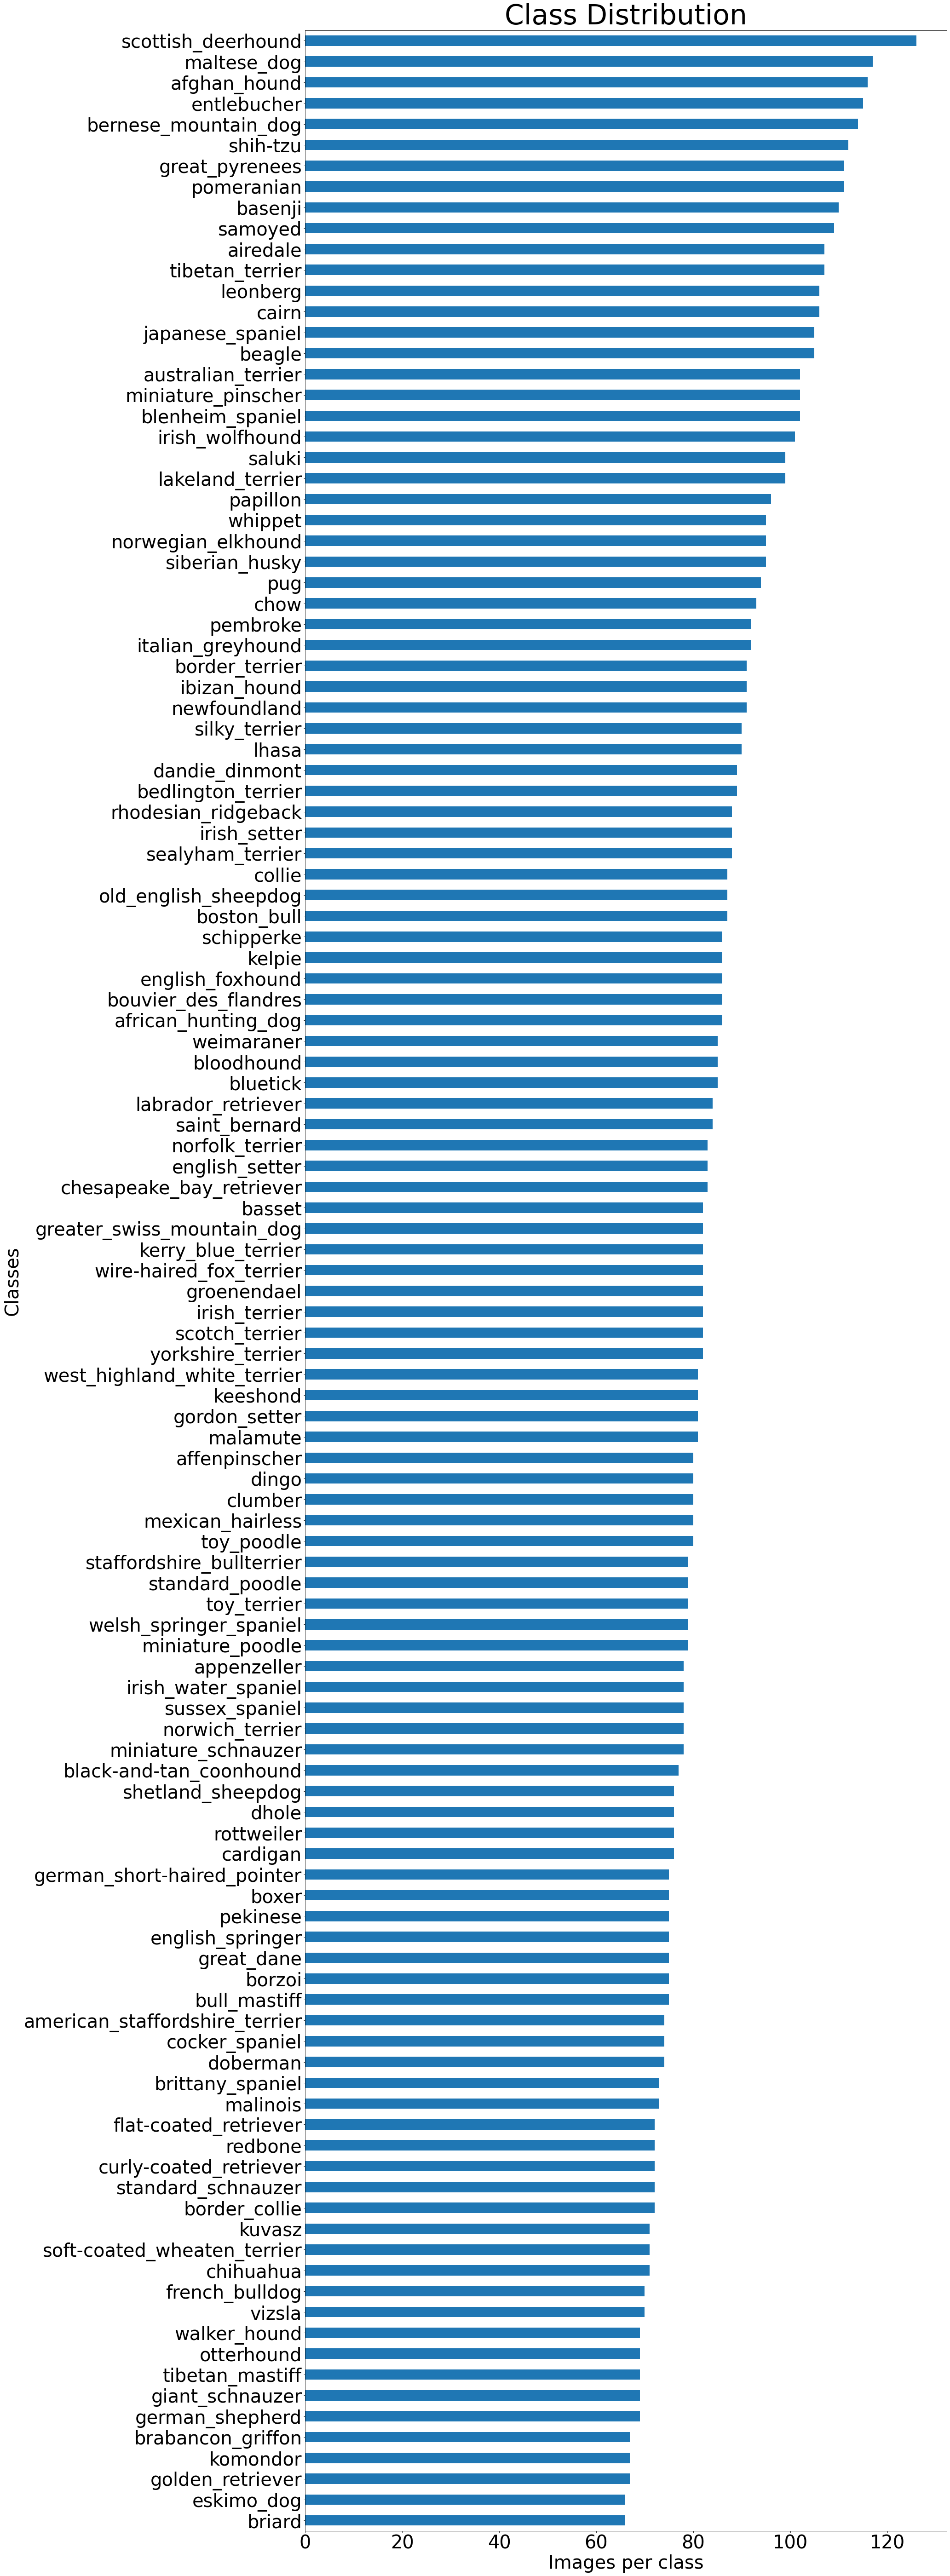

In [ ]:
ax=pd.value_counts(labels['breed'],ascending=True).plot(kind='barh',fontsize="40",title="Class Distribution",figsize=(25,100))
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(40)
ax.yaxis.label.set_size(40)
ax.title.set_size(60)
plt.show()

In [ ]:
train_path = '/content/train/'
test_path = '/content/test/'

train=os.listdir(train_path)
test=os.listdir(test_path)
print ('Number of train images:', len(train))
print('Number of test images:', len(test))

Number of train images: 10222
Number of test images: 10357


000bec180eb18c7604dcecc8fe0dba07.jpg 	 shape: (375, 500, 3)
001513dfcb2ffafc82cccf4d8bbaba97.jpg 	 shape: (375, 500, 3)
001cdf01b096e06d78e9e5112d419397.jpg 	 shape: (375, 500, 3)
00214f311d5d2247d5dfe4fe24b2303d.jpg 	 shape: (344, 400, 3)
0021f9ceb3235effd7fcde7f7538ed62.jpg 	 shape: (500, 500, 3)
002211c81b498ef88e1b40b9abf84e1d.jpg 	 shape: (375, 500, 3)
00290d3e1fdd27226ba27a8ce248ce85.jpg 	 shape: (470, 500, 3)
002a283a315af96eaea0e28e7163b21b.jpg 	 shape: (227, 231, 3)
003df8b8a8b05244b1d920bb6cf451f9.jpg 	 shape: (500, 474, 3)


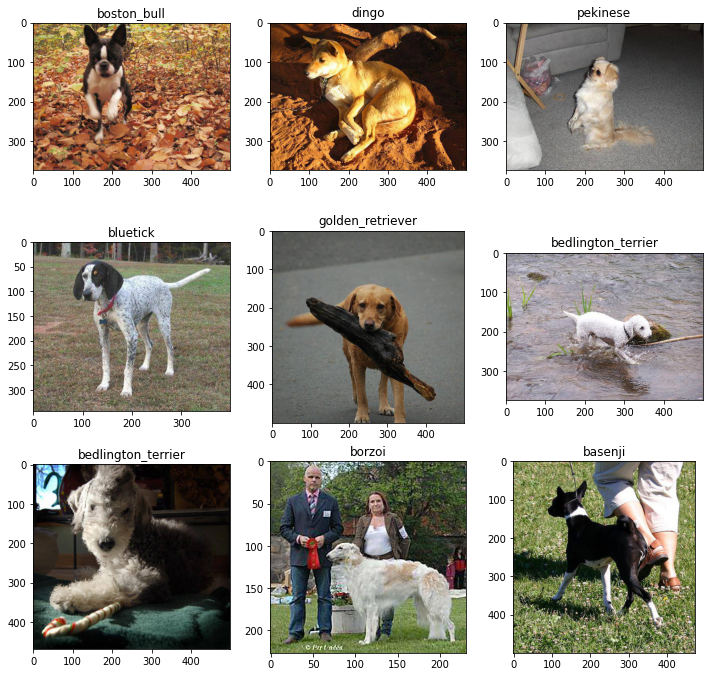

In [ ]:
#Example images from train dataset
plt.figure(figsize = (12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    breed = labels.loc[i, 'breed']
    image_id = labels.loc[i, 'id']+".jpg"
    image = plt.imread(os.path.join(train_path, image_id))
    print(image_id, "\t shape:", image.shape)
    plt.imshow(image)
    plt.title(breed)
plt.show()

000621fb3cbb32d8935728e48679680e.jpg 	 shape: (449, 600, 3)
00102ee9d8eb90812350685311fe5890.jpg 	 shape: (420, 500, 3)
0012a730dfa437f5f3613fb75efcd4ce.jpg 	 shape: (375, 500, 3)
001510bc8570bbeee98c8d80c8a95ec1.jpg 	 shape: (375, 500, 3)
001a5f3114548acdefa3d4da05474c2e.jpg 	 shape: (225, 300, 3)
00225dcd3e4d2410dd53239f95c0352f.jpg 	 shape: (202, 142, 3)
002c2a3117c2193b4d26400ce431eebd.jpg 	 shape: (375, 500, 3)
002c58d413a521ae8d1a5daeb35fc803.jpg 	 shape: (318, 360, 3)
002f80396f1e3db687c5932d7978b196.jpg 	 shape: (375, 500, 3)


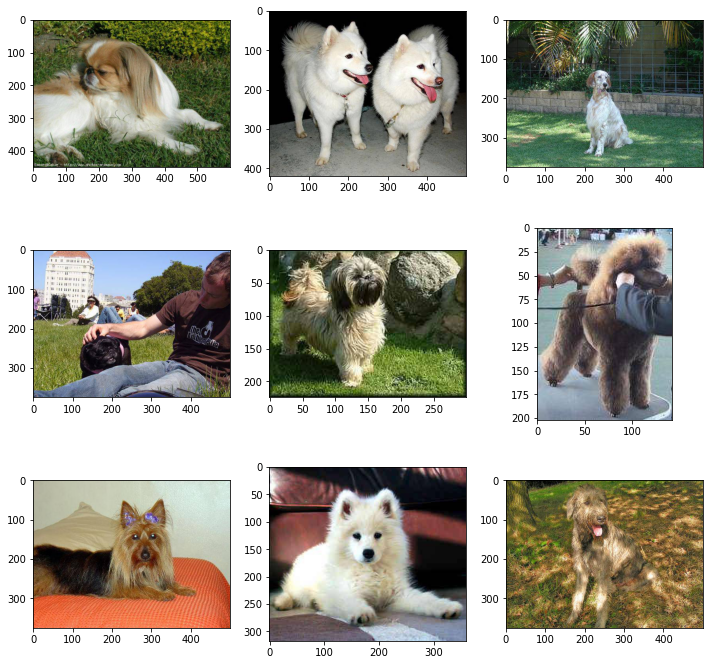

In [ ]:
#Example images from test dataset
plt.figure(figsize = (12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    image_id = samples.loc[i, 'id']+".jpg"
    image = plt.imread(os.path.join(test_path, image_id))
    print(image_id, "\t shape:", image.shape)
    plt.imshow(image)
plt.show()

In [ ]:
data = tf.keras.preprocessing.image.ImageDataGenerator(
                  rescale=1./255,
                  #shear_range=0.8,
                  zoom_range=0.2,
                  horizontal_flip=True,
                  validation_split=0.2
                 )
test_data = ImageDataGenerator(rescale = 1/255.0)

In [ ]:
def addjpg(id):
    return id+".jpg"

In [ ]:
labels['id'] = labels['id'].apply(addjpg)
samples['id'] = samples['id'].apply(addjpg)

In [ ]:
train_ds = data.flow_from_dataframe(
    labels,
    directory = '/content/train',
    x_col = 'id',
    y_col = 'breed',
    subset="training",
    color_mode="rgb",
    target_size = (320,320),
    class_mode="categorical",
    batch_size=128,
    shuffle=True,
    seed=7,
)

Found 8178 validated image filenames belonging to 120 classes.


In [ ]:
val_ds = data.flow_from_dataframe(
    labels,
    directory = '/content/train',
    x_col = 'id',
    y_col = 'breed',
    subset="validation",
    color_mode="rgb",
    target_size = (320,320),
    class_mode="categorical",
    batch_size=128,
    shuffle=False,
    seed=7,
)

Found 2044 validated image filenames belonging to 120 classes.


In [ ]:
indices = train_ds.class_indices
class_names = list(indices.keys())
class_names[:10]

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle']

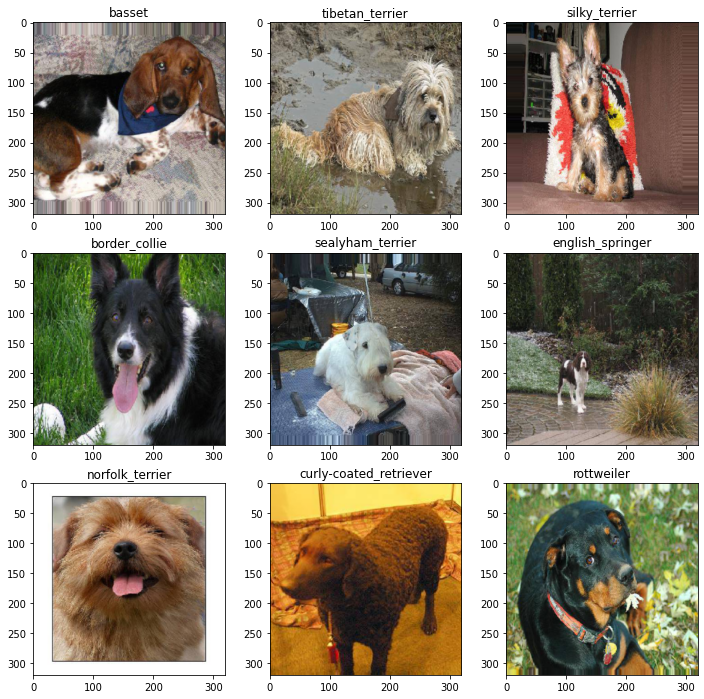

In [ ]:
x,y = next(train_ds)
#x.shape()

plt.figure(figsize = (12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    image = x[i];
    breed = class_names[np.argmax(y[i])]
    plt.imshow(image)
    plt.title(breed)
plt.show()

# Transfer learning

In [ ]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2

base_model = InceptionResNetV2(include_top=False,
                     weights='imagenet',
                     input_shape=(320,320,3)
                     )
base_model.trainable = False

219070464/219055592 [==============================] - 2s 0us/step


In [ ]:
model_tl = Sequential([
    base_model,

    GlobalAveragePooling2D(),
    
    Dense(256,activation = 'relu'),
    Dropout(0.3),
    
    Dense(120,activation='softmax')
])
model_tl.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 8, 8, 1536)       54336736  
 onal)                                                           
                                                                 
 global_average_pooling2d_3   (None, 1536)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_8 (Dense)             (None, 256)               393472    
                                                                 
 dropout_28 (Dropout)        (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 120)               30840     
                                                                 
Total params: 54,761,048
Trainable params: 424,312
Non

In [ ]:
model_tl.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist_tl = model_tl.fit(train_ds,validation_data=val_ds, epochs=10, verbose=2, batch_size=32)

Epoch 1/10
64/64 - 288s - loss: 1.7222 - accuracy: 0.6989 - val_loss: 0.3932 - val_accuracy: 0.8909 - 288s/epoch - 4s/step
Epoch 2/10
64/64 - 255s - loss: 0.4198 - accuracy: 0.8827 - val_loss: 0.3489 - val_accuracy: 0.9007 - 255s/epoch - 4s/step
Epoch 3/10
64/64 - 255s - loss: 0.3638 - accuracy: 0.8891 - val_loss: 0.3530 - val_accuracy: 0.8963 - 255s/epoch - 4s/step
Epoch 4/10
64/64 - 255s - loss: 0.3347 - accuracy: 0.8972 - val_loss: 0.3357 - val_accuracy: 0.9061 - 255s/epoch - 4s/step
Epoch 5/10
64/64 - 255s - loss: 0.3111 - accuracy: 0.9058 - val_loss: 0.3428 - val_accuracy: 0.8982 - 255s/epoch - 4s/step
Epoch 6/10
64/64 - 255s - loss: 0.3023 - accuracy: 0.9058 - val_loss: 0.3291 - val_accuracy: 0.9007 - 255s/epoch - 4s/step
Epoch 7/10
64/64 - 255s - loss: 0.2802 - accuracy: 0.9112 - val_loss: 0.3350 - val_accuracy: 0.8968 - 255s/epoch - 4s/step
Epoch 8/10
64/64 - 254s - loss: 0.2711 - accuracy: 0.9150 - val_loss: 0.3415 - val_accuracy: 0.9036 - 254s/epoch - 4s/step
Epoch 9/10
64/64

In [ ]:
model_tl.save('model_tl.h5')

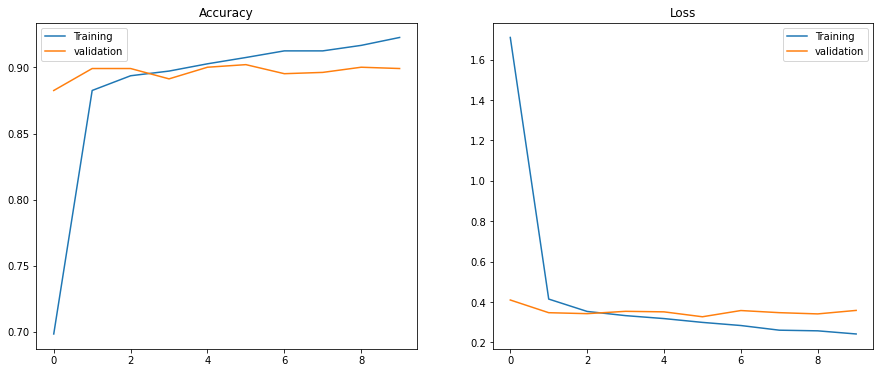

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist_tl.epoch,hist_tl.history['accuracy'],label = 'Training')
plt.plot(hist_tl.epoch,hist_tl.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist_tl.epoch,hist_tl.history['loss'],label = 'Training')
plt.plot(hist_tl.epoch,hist_tl.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model_tl.evaluate(val_ds, verbose=1)

16/16 [==============================] - 52s 3s/step - loss: 0.3391 - accuracy: 0.8992


In [ ]:
predictions = model_tl.predict(val_ds,verbose=1)

16/16 [==============================] - 54s 3s/step


In [ ]:
predictions.shape

(2044, 120)

In [ ]:
pred  = [np.argmax(i) for i in predictions]

In [ ]:
filenames = []
classnames = []
classnames1 = []
for i in range(2044):
    filenames.append(val_ds.filenames[i])
    classnames.append(val_ds.classes[i])
    

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(classnames,pred)

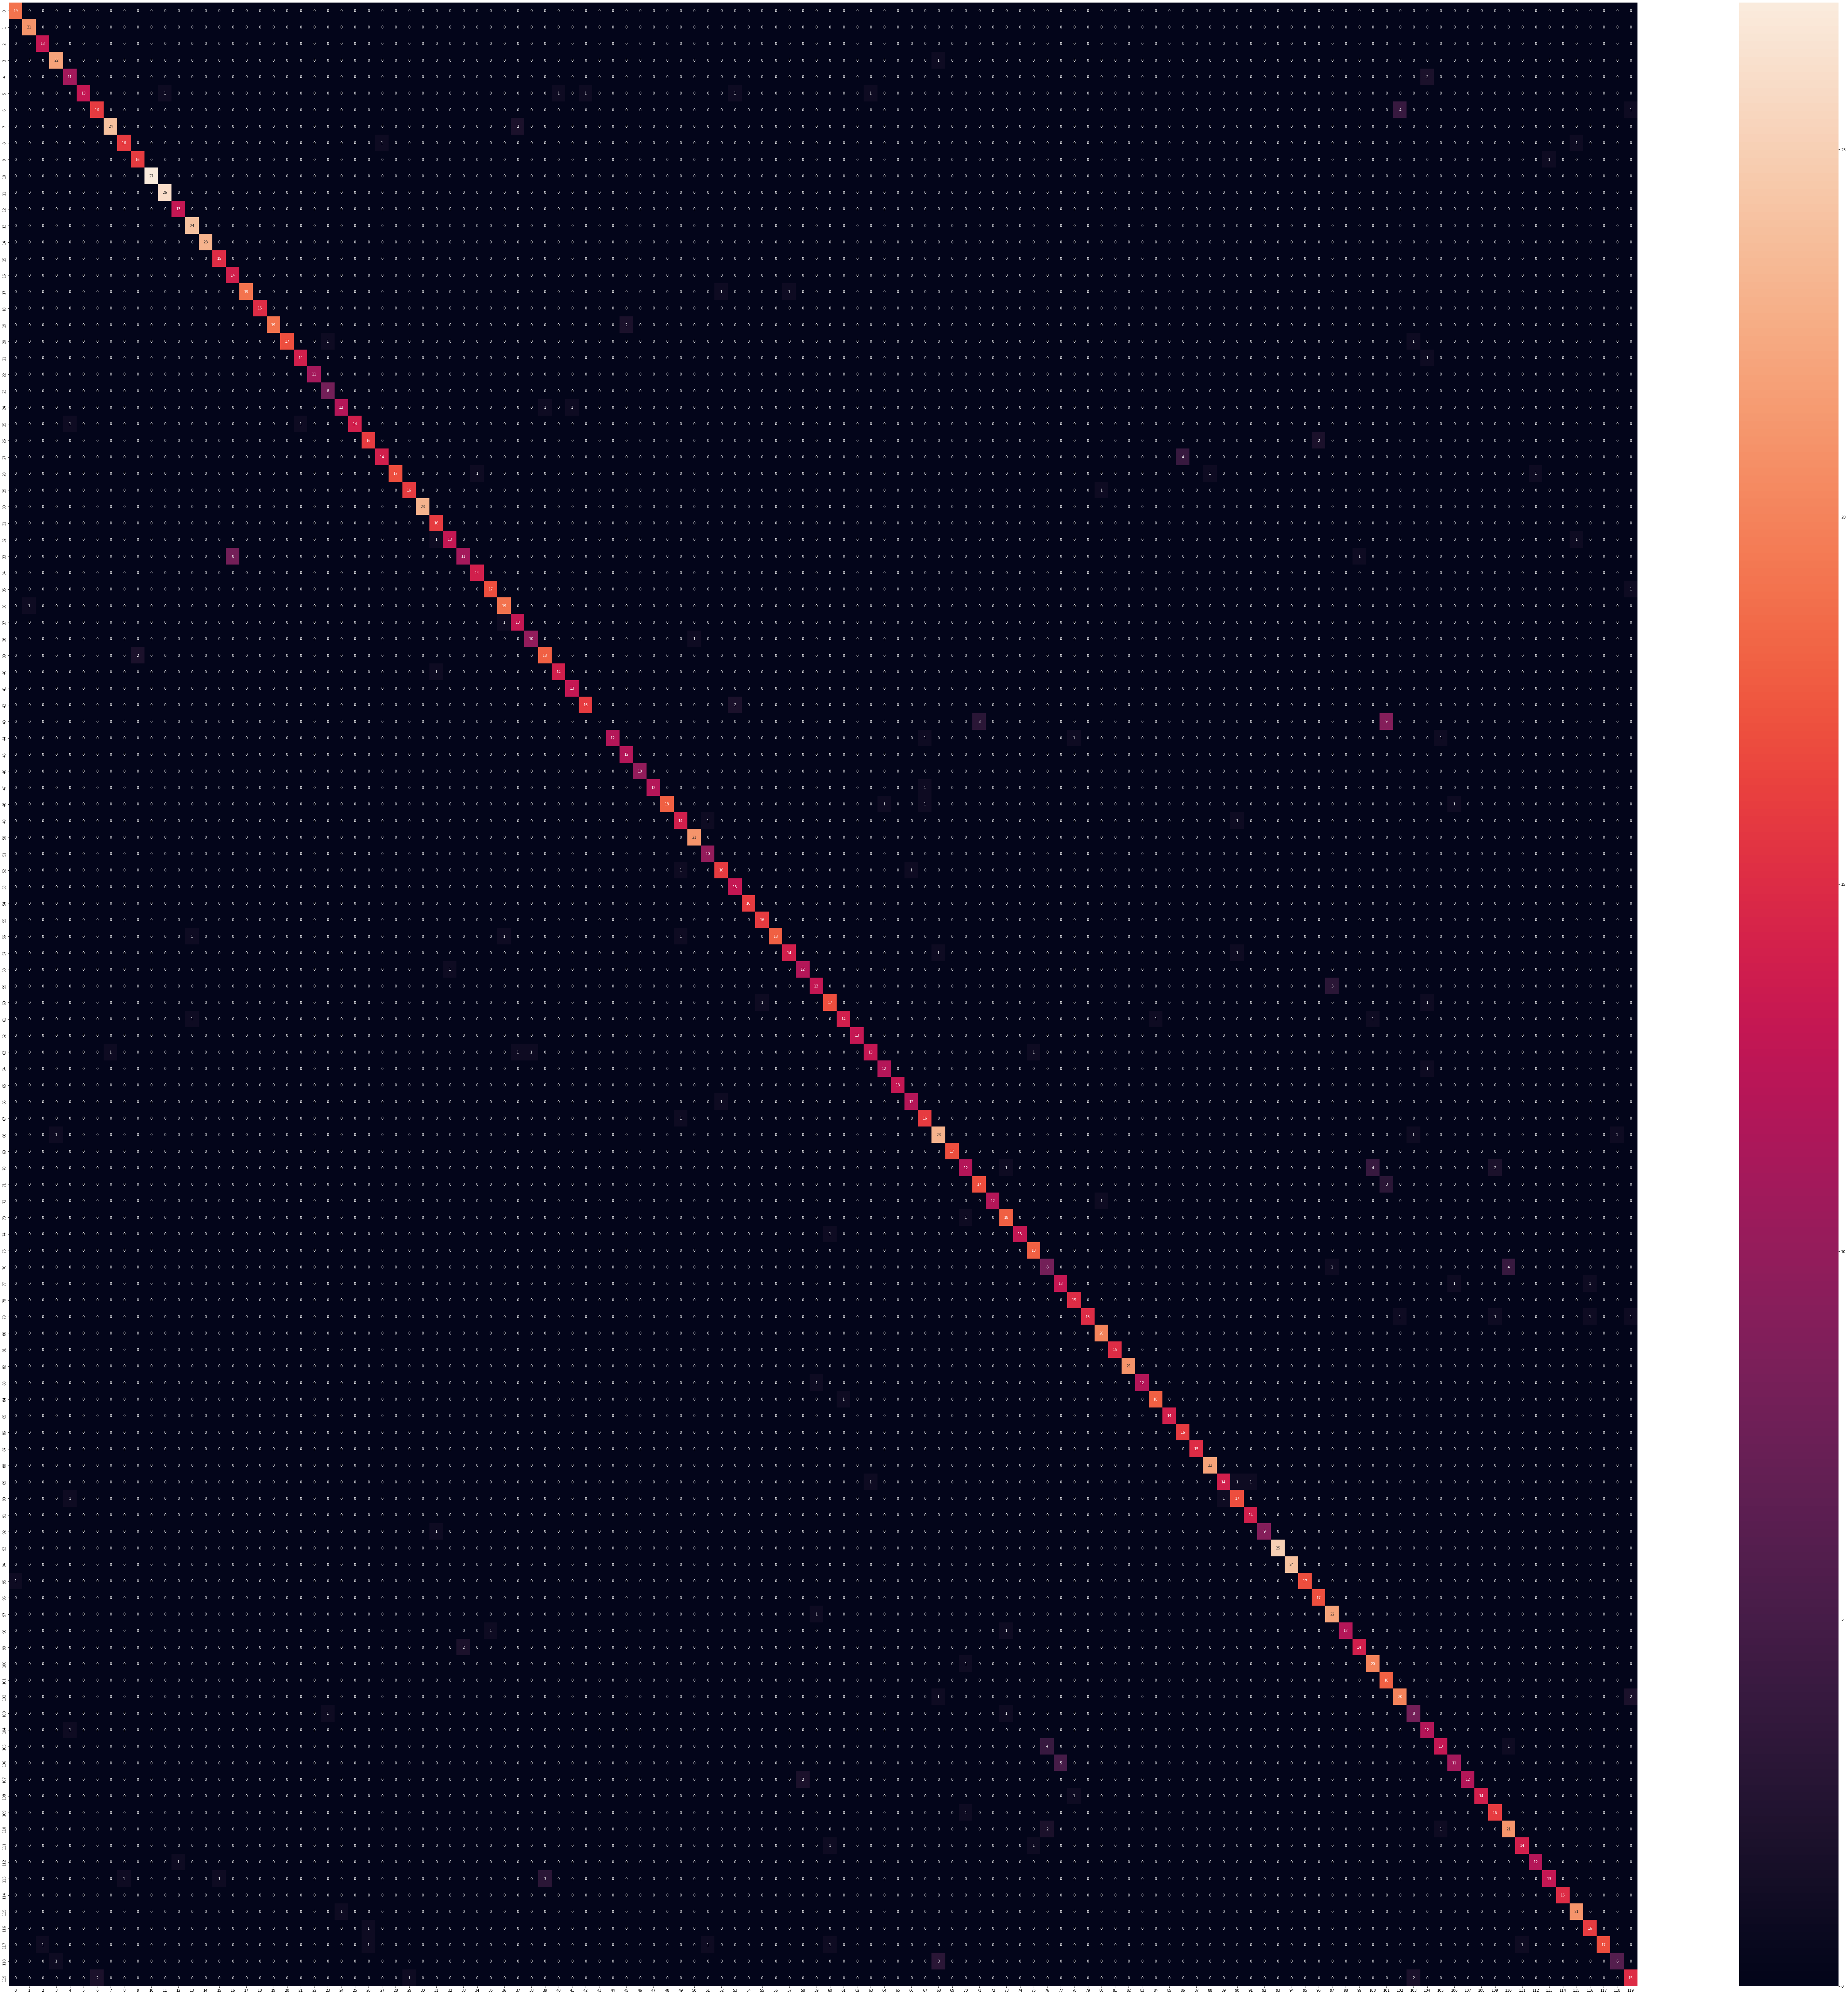

In [ ]:
import seaborn as sn
plt.figure(figsize = (100,100))
sn.heatmap(cm, annot=True)

In [ ]:
print(classification_report(classnames, pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        13
           3       0.81      0.91      0.86        23
           4       0.85      0.85      0.85        13
           5       0.93      0.78      0.85        18
           6       0.81      0.81      0.81        21
           7       1.00      0.92      0.96        26
           8       0.85      0.94      0.89        18
           9       0.89      1.00      0.94        17
          10       1.00      1.00      1.00        27
          11       0.96      1.00      0.98        26
          12       1.00      0.92      0.96        13
          13       1.00      1.00      1.00        24
          14       1.00      0.87      0.93        23
          15       1.00      0.93      0.97        15
          16       0.64      1.00      0.78        14
          17       1.00    

In [ ]:
indices_val = val_ds.class_indices
class_names_val = list(indices_val.keys())
print(class_names_val)

['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale', 'american_staffordshire_terrier', 'appenzeller', 'australian_terrier', 'basenji', 'basset', 'beagle', 'bedlington_terrier', 'bernese_mountain_dog', 'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound', 'bluetick', 'border_collie', 'border_terrier', 'borzoi', 'boston_bull', 'bouvier_des_flandres', 'boxer', 'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff', 'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua', 'chow', 'clumber', 'cocker_spaniel', 'collie', 'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo', 'doberman', 'english_foxhound', 'english_setter', 'english_springer', 'entlebucher', 'eskimo_dog', 'flat-coated_retriever', 'french_bulldog', 'german_shepherd', 'german_short-haired_pointer', 'giant_schnauzer', 'golden_retriever', 'gordon_setter', 'great_dane', 'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael', 'ibizan_hound', 'irish_setter', 'irish_terrier', 'iris

In [ ]:
for i in range (0,120):
  print(i, class_names_val[i])

0 affenpinscher
1 afghan_hound
2 african_hunting_dog
3 airedale
4 american_staffordshire_terrier
5 appenzeller
6 australian_terrier
7 basenji
8 basset
9 beagle
10 bedlington_terrier
11 bernese_mountain_dog
12 black-and-tan_coonhound
13 blenheim_spaniel
14 bloodhound
15 bluetick
16 border_collie
17 border_terrier
18 borzoi
19 boston_bull
20 bouvier_des_flandres
21 boxer
22 brabancon_griffon
23 briard
24 brittany_spaniel
25 bull_mastiff
26 cairn
27 cardigan
28 chesapeake_bay_retriever
29 chihuahua
30 chow
31 clumber
32 cocker_spaniel
33 collie
34 curly-coated_retriever
35 dandie_dinmont
36 dhole
37 dingo
38 doberman
39 english_foxhound
40 english_setter
41 english_springer
42 entlebucher
43 eskimo_dog
44 flat-coated_retriever
45 french_bulldog
46 german_shepherd
47 german_short-haired_pointer
48 giant_schnauzer
49 golden_retriever
50 gordon_setter
51 great_dane
52 great_pyrenees
53 greater_swiss_mountain_dog
54 groenendael
55 ibizan_hound
56 irish_setter
57 irish_terrier
58 irish_water_s

In [ ]:
n=0
for i in range (2044):
  if classnames[i]!=pred[i]:
    n=n+1
    print(classnames[i], pred[i])
    a=classnames[i]
    b=pred[i]
    print(class_names_val[a], "\t prediction:", class_names_val[b])
    
    print('\n')

print("number of misclassified images:", n)

49 90
golden_retriever 	 prediction: rhodesian_ridgeback


106 77
standard_schnauzer 	 prediction: miniature_schnauzer


113 8
walker_hound 	 prediction: basset


56 24
irish_setter 	 prediction: brittany_spaniel


84 61
papillon 	 prediction: japanese_spaniel


33 16
collie 	 prediction: border_collie


71 101
malamute 	 prediction: siberian_husky


17 103
border_terrier 	 prediction: soft-coated_wheaten_terrier


21 25
boxer 	 prediction: bull_mastiff


118 3
wire-haired_fox_terrier 	 prediction: airedale


93 67
saluki 	 prediction: labrador_retriever


57 68
irish_terrier 	 prediction: lakeland_terrier


90 89
rhodesian_ridgeback 	 prediction: redbone


70 109
lhasa 	 prediction: tibetan_terrier


43 101
eskimo_dog 	 prediction: siberian_husky


54 95
groenendael 	 prediction: schipperke


103 68
soft-coated_wheaten_terrier 	 prediction: lakeland_terrier


115 41
welsh_springer_spaniel 	 prediction: english_springer


43 94
eskimo_dog 	 prediction: samoyed


116 106
west_highland_w

# Simple model for top 3 classes

In [ ]:
# Selecting top 3 breeds 
breeds_3= ['scottish_deerhound','maltese_dog','bernese_mountain_dog']
labels_3 = labels[(labels['breed'].isin(breeds_3))]
labels_3 = labels_3.reset_index()
labels_3.head()


index                                    id                 breed
0      9  0042188c895a2f14ef64a918ed9c7b64.jpg    scottish_deerhound
1     12  00693b8bc2470375cc744a6391d397ec.jpg           maltese_dog
2     79  01e787576c003930f96c966f9c3e1d44.jpg    scottish_deerhound
3     90  022b34fd8734b39995a9f38a4f3e7b6b.jpg           maltese_dog
4    118  02d54f0dfb40038765e838459ae8c956.jpg  bernese_mountain_dog

In [ ]:
labels_3

index                                    id                 breed
0        9  0042188c895a2f14ef64a918ed9c7b64.jpg    scottish_deerhound
1       12  00693b8bc2470375cc744a6391d397ec.jpg           maltese_dog
2       79  01e787576c003930f96c966f9c3e1d44.jpg    scottish_deerhound
3       90  022b34fd8734b39995a9f38a4f3e7b6b.jpg           maltese_dog
4      118  02d54f0dfb40038765e838459ae8c956.jpg  bernese_mountain_dog
..     ...                                   ...                   ...
352  10154  fe3e760d763e186541e18f303cd7caca.jpg  bernese_mountain_dog
353  10158  fe50bac6c389d137ea01c9cfc7346ca8.jpg    scottish_deerhound
354  10178  fef5d4cdaf50cf159102e803c7d6aa9c.jpg  bernese_mountain_dog
355  10200  ff7d9c08091acc3b18b869951feeb013.jpg           maltese_dog
356  10204  ffa0055ec324829882186bae29491645.jpg           maltese_dog

[357 rows x 3 columns]

In [ ]:
from sklearn.preprocessing import label_binarize
from tqdm import tqdm
from keras.preprocessing import image as imggg
from sklearn.model_selection import train_test_split

In [ ]:
# Creating numpy matrix with zeros
X_data = np.zeros((len(labels_3), 320, 320, 3), dtype='float32')
# One hot encoding
Y_data = label_binarize(labels_3['breed'], classes = breeds_3)

# Reading and converting image to numpy array and normalizing dataset
for i in tqdm(range(len(labels_3))):
    img = imggg.load_img('/content/train/%s' % labels_3['id'][i], target_size=(320, 320))
    img = imggg.img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x / 255.0
    
# Printing train image and one hot encode shape & size
print('\nTrain Images shape: ',X_data.shape,' size: {:,}'.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,' size: {:,}'.format(Y_data.size))

100%|██████████| 357/357 [00:02<00:00, 163.29it/s]


Train Images shape:  (357, 320, 320, 3)  size: 109,670,400
One-hot encoded output shape:  (357, 3)  size: 1,071


In [ ]:
my_model_limited = Sequential([Conv2D(16, (3,3), activation='relu', input_shape=(320,320, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.1),
    Flatten(),
    Dense(3, activation = "softmax")

])

In [ ]:
my_model_limited.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
my_model_limited.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 318, 318, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 159, 159, 16)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 159, 159, 16)      0         
                                                                 
 flatten_2 (Flatten)         (None, 404496)            0         
                                                                 
 dense_3 (Dense)             (None, 3)                 1213491   
                                                                 
Total params: 1,213,939
Trainable params: 1,213,939
Non-trainable params: 0
____________________________________________

In [ ]:
callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience =5 , restore_best_weights = True),
                                  tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience = 2, verbose =1)]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.1)

In [ ]:
history = my_model_limited.fit(X_train, Y_train, batch_size = 12, epochs = 10, 
                    validation_data = (X_test, Y_test), callbacks=callbacks)

Epoch 1/10
27/27 [==============================] - 1s 31ms/step - loss: 4.6381 - accuracy: 0.4860 - val_loss: 1.2314 - val_accuracy: 0.4722 - lr: 0.0010
Epoch 2/10
27/27 [==============================] - 1s 29ms/step - loss: 0.6425 - accuracy: 0.7539 - val_loss: 0.7864 - val_accuracy: 0.6111 - lr: 0.0010
Epoch 3/10
27/27 [==============================] - 1s 35ms/step - loss: 0.2365 - accuracy: 0.9190 - val_loss: 0.4888 - val_accuracy: 0.8611 - lr: 0.0010
Epoch 4/10
27/27 [==============================] - 1s 29ms/step - loss: 0.0611 - accuracy: 0.9938 - val_loss: 0.4643 - val_accuracy: 0.8611 - lr: 0.0010
Epoch 5/10
27/27 [==============================] - 1s 28ms/step - loss: 0.0222 - accuracy: 1.0000 - val_loss: 0.4946 - val_accuracy: 0.8611 - lr: 0.0010
Epoch 6/10
27/27 [==============================] - 1s 27ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.4365 - val_accuracy: 0.8611 - lr: 0.0010
Epoch 7/10
27/27 [==============================] - 1s 25ms/step - loss: 0.0

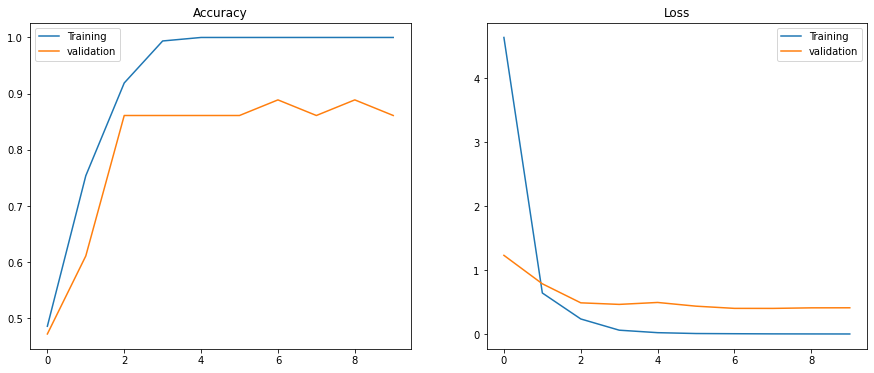

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(history.epoch,history.history['accuracy'],label = 'Training')
plt.plot(history.epoch,history.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.epoch,history.history['loss'],label = 'Training')
plt.plot(history.epoch,history.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
probs = my_model_limited.predict(X_test)
print(f'Probs shape={probs.shape}')
y_pred = np.argmax(probs, axis=1)

Probs shape=(36, 3)


In [ ]:
y_test_labels=np.argmax(Y_test, axis=1)

In [ ]:
cm = confusion_matrix(y_test_labels,y_pred)

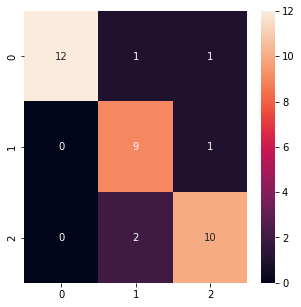

In [ ]:
plt.figure(figsize = (5,5))
sn.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test_labels, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.75      0.90      0.82        10
           2       0.83      0.83      0.83        12

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.88      0.86      0.86        36



In [ ]:
from keras.regularizers import l2

#Trying out few basic CNN models 

In [ ]:
my_model = Sequential([Conv2D(64, (3,3), activation='relu', input_shape=(320,320, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.1),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.1),
    GlobalAveragePooling2D(),
    Dense(120, activation = "softmax")

])

my_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 318, 318, 64)      1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 159, 159, 64)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 159, 159, 64)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 157, 157, 128)     73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 78, 78, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 76, 76, 256)      

In [ ]:
my_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = my_model.fit(train_ds,validation_data=val_ds, epochs=60, verbose=2, batch_size=32)

Epoch 1/60
64/64 - 267s - loss: 4.7856 - accuracy: 0.0097 - val_loss: 4.7852 - val_accuracy: 0.0117 - 267s/epoch - 4s/step
Epoch 2/60
64/64 - 240s - loss: 4.7796 - accuracy: 0.0137 - val_loss: 4.7841 - val_accuracy: 0.0113 - 240s/epoch - 4s/step
Epoch 3/60
64/64 - 241s - loss: 4.7756 - accuracy: 0.0139 - val_loss: 4.7815 - val_accuracy: 0.0122 - 241s/epoch - 4s/step
Epoch 4/60
64/64 - 242s - loss: 4.7691 - accuracy: 0.0150 - val_loss: 4.7742 - val_accuracy: 0.0127 - 242s/epoch - 4s/step
Epoch 5/60
64/64 - 241s - loss: 4.7570 - accuracy: 0.0166 - val_loss: 4.7646 - val_accuracy: 0.0083 - 241s/epoch - 4s/step
Epoch 6/60
64/64 - 241s - loss: 4.7417 - accuracy: 0.0163 - val_loss: 4.7536 - val_accuracy: 0.0103 - 241s/epoch - 4s/step
Epoch 7/60
64/64 - 243s - loss: 4.7273 - accuracy: 0.0199 - val_loss: 4.7424 - val_accuracy: 0.0147 - 243s/epoch - 4s/step
Epoch 8/60
64/64 - 243s - loss: 4.7161 - accuracy: 0.0208 - val_loss: 4.7389 - val_accuracy: 0.0113 - 243s/epoch - 4s/step
Epoch 9/60
64/64

In [ ]:
my_model2 = Sequential([Conv2D(64, (3,3), activation='relu', input_shape=(320,320, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.1),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.1),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.1),
    GlobalAveragePooling2D(),
    Dense(120, activation = "softmax")

])

my_model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 318, 318, 64)      1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 159, 159, 64)     0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 159, 159, 64)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 157, 157, 128)     73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 78, 78, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 76, 76, 256)      

In [ ]:
my_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history2 = my_model2.fit(train_ds,validation_data=val_ds, epochs=50, verbose=2, batch_size=128,
                         callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience =5 , restore_best_weights = True),
                                  tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience = 2, verbose =1)])

Epoch 1/50
64/64 - 250s - loss: 4.7852 - accuracy: 0.0112 - val_loss: 4.7853 - val_accuracy: 0.0132 - lr: 1.0000e-04 - 250s/epoch - 4s/step
Epoch 2/50
64/64 - 242s - loss: 4.7760 - accuracy: 0.0110 - val_loss: 4.7737 - val_accuracy: 0.0127 - lr: 1.0000e-04 - 242s/epoch - 4s/step
Epoch 3/50
64/64 - 241s - loss: 4.7498 - accuracy: 0.0148 - val_loss: 4.7466 - val_accuracy: 0.0157 - lr: 1.0000e-04 - 241s/epoch - 4s/step
Epoch 4/50
64/64 - 241s - loss: 4.7235 - accuracy: 0.0192 - val_loss: 4.7312 - val_accuracy: 0.0157 - lr: 1.0000e-04 - 241s/epoch - 4s/step
Epoch 5/50
64/64 - 241s - loss: 4.7064 - accuracy: 0.0210 - val_loss: 4.7234 - val_accuracy: 0.0132 - lr: 1.0000e-04 - 241s/epoch - 4s/step
Epoch 6/50
64/64 - 241s - loss: 4.6889 - accuracy: 0.0243 - val_loss: 4.7165 - val_accuracy: 0.0127 - lr: 1.0000e-04 - 241s/epoch - 4s/step
Epoch 7/50
64/64 - 240s - loss: 4.6733 - accuracy: 0.0267 - val_loss: 4.6941 - val_accuracy: 0.0191 - lr: 1.0000e-04 - 240s/epoch - 4s/step
Epoch 8/50
64/64 - 2

In [ ]:
my_model3 = Sequential([Conv2D(16, (3,3), activation='relu', input_shape=(320,320, 3)),
    MaxPooling2D(2, 2),
    Dropout(0.1),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.1),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.1),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.1),
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dense(256, activation ='relu'),
    Dropout(0.3),
    Dense(120, activation = "softmax")

])

my_model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 318, 318, 16)      448       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 159, 159, 16)     0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 159, 159, 16)      0         
                                                                 
 conv2d_33 (Conv2D)          (None, 157, 157, 32)      4640      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 78, 78, 32)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 78, 78, 32)       

In [ ]:
my_model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history3 = my_model3.fit(train_ds,validation_data=val_ds, epochs=50, verbose=2, batch_size=64,
                         callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience =5 , restore_best_weights = True),
                                  tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience = 2, verbose =1)])

Epoch 1/50
64/64 - 228s - loss: 4.7872 - accuracy: 0.0095 - val_loss: 4.7857 - val_accuracy: 0.0093 - lr: 0.0010 - 228s/epoch - 4s/step
Epoch 2/50
64/64 - 217s - loss: 4.7820 - accuracy: 0.0088 - val_loss: 4.7844 - val_accuracy: 0.0093 - lr: 0.0010 - 217s/epoch - 3s/step
Epoch 3/50
64/64 - 216s - loss: 4.7792 - accuracy: 0.0124 - val_loss: 4.7843 - val_accuracy: 0.0103 - lr: 0.0010 - 216s/epoch - 3s/step
Epoch 4/50

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
64/64 - 216s - loss: 4.7786 - accuracy: 0.0100 - val_loss: 4.7857 - val_accuracy: 0.0103 - lr: 0.0010 - 216s/epoch - 3s/step
Epoch 5/50
64/64 - 216s - loss: 4.7756 - accuracy: 0.0120 - val_loss: 4.7863 - val_accuracy: 0.0113 - lr: 1.0000e-04 - 216s/epoch - 3s/step
Epoch 6/50

Epoch 6: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
64/64 - 215s - loss: 4.7750 - accuracy: 0.0110 - val_loss: 4.7865 - val_accuracy: 0.0113 - lr: 1.0000e-04 - 215s/epoch - 3s/step
Epoch 7/50
64/64 - 2

None of the models used above were efficient enough to continue training. It shows that is not that easy to train model from scratch with this much data and it takes very long time. Pretrained models are the best solutions for these kinds of problems. 
